# REDO AGE, MASS PLOTS

# Read in all the files, and make some plots

*Andrew Bowen provided much of the script to read in the file. [See his GitHub repo](https://github.com/andrewbowen19/CEB_Project)*

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import sys

import csv

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

%matplotlib inline

In [45]:
#MWSC - Milky Way Star Clusters Catalog
#https://heasarc.gsfc.nasa.gov/W3Browse/all/mwsc.html

mwsc_df = pd.read_csv("MWSC.txt", header=3, delimiter='|')
mwsc_df.columns = mwsc_df.columns.str.strip()

#fix the IDs
mwsc_ID = mwsc_df['name']
mwsc_ID = mwsc_ID.str.strip().str.replace( ' ','_' )
mwsc_df['name'] = mwsc_ID

#take only the open clusters
mwsc_df = mwsc_df.loc[(~mwsc_df['class'].str.strip().str.contains('GLOBULAR')) &
                      (~mwsc_df['class'].str.strip().str.contains('NEBULA')) &
                      (~mwsc_df['class'].str.strip().str.contains('UNIDENTIFIED'))]

#remove the "Unnamed" columns
mwsc_df = mwsc_df.loc[:, ~mwsc_df.columns.str.contains('^Unnamed')]

print(set(mwsc_df['class'].values))

mwsc_df

{'                          OB ASSOCIATION/HII REGION', '                                  OPEN STAR CLUSTER'}


,name,broad_type,cluster_status,ra,dec,lii,bii,core_radius,central_radius,cluster_radius,pm_ra,pm_dec,pm_tot_error,rad_vel,rad_vel_error,num_rad_vel_stars,num_core_stars,num_central_stars,num_cluster_stars,distance,e_bv,distance_modulus,e_jk,e_jh,delta_h,log_age,log_age_error,num_log_age_stars,king_core_radius,king_core_radius_error,king_tidal_radius,king_tidal_radius_error,king_norm_factor,king_norm_factor_error,reference_code,cluster_type,metallicity,metallicity_error,num_metallicity_stars,comments,class
0,MWSC_4688,,,23 51 54,-86 43.2,303.907,-30.295,0.020,0.100,0.185,3.20,-5.00,1.13,,,,2,22,57,1336,0.219,10.700,0.105,0.070,0.000,9.390,,,1.05,0.39,7.01,2.51,2.51,0.67,AIPk,,,,0,...,OPEN STAR CL...
1,MWSC_5684,,,12 53 43,-86 38.9,302.968,-23.776,0.020,0.080,0.155,-13.04,0.17,1.05,,,,3,19,52,1432,0.375,10.900,0.180,0.120,0.020,9.180,0.023,3,0.61,0.42,7.54,5.79,1.88,1.09,ARIs,,,,0,...,OPEN STAR CL...
2,MWSC_5692,,,17 47 20,-86 36.6,306.562,-26.146,0.025,0.095,0.135,-6.22,-9.02,1.38,,,,4,18,28,1555,0.437,11.100,0.210,0.140,0.020,8.930,,,0.76,0.56,5.18,3.82,1.51,0.77,ARIs,,,,0,...,OPEN STAR CL...
3,MWSC_4005,,,00 11 28,-85 28.8,303.852,-31.577,0.012,0.100,0.165,9.31,-1.47,0.95,,,,3,26,42,1159,0.250,10.400,0.120,0.080,-0.020,9.375,,,0.36,0.13,4.69,1.85,15.94,6.19,AIPk,,,,0,...,OPEN STAR CL...
4,MWSC_4176,,,14 27 18,-85 25.2,304.950,-22.929,0.025,0.150,0.280,-9.41,0.12,0.69,,,,4,53,155,1093,0.333,10.300,0.160,0.107,-0.030,9.315,,,0.97,0.24,6.84,1.58,6.46,1.31,AIPk,,,,0,...,OPEN STAR CL...
5,ESO_008-06,r,c,14 56 55,-83 26.7,306.593,-21.485,0.025,0.130,0.185,-5.26,-4.21,0.80,,,,5,46,78,1380,0.312,10.800,0.150,0.100,0.030,9.300,,,0.66,0.25,5.60,2.18,5.93,1.91,DIAS,,,,0,"Sparse; center is shifted to 14.9485h,-83.445d...",OPEN STAR CL...
6,MWSC_4219,,,15 42 14,-83 11.7,307.905,-22.041,0.015,0.115,0.200,-9.26,-3.14,0.74,,,,2,36,95,1606,0.375,11.150,0.180,0.120,0.020,9.100,,,2.81,0.76,9.78,2.13,1.71,0.41,AIPk,,,,0,...,OPEN STAR CL...
7,MWSC_5575,,,01 59 42,-83 03.0,300.484,-33.751,0.015,0.090,0.150,6.33,-2.50,1.96,,,,1,10,20,2191,0.302,11.800,0.145,0.097,0.015,9.200,,,1.95,1.00,12.13,6.13,0.79,0.18,ARIs,,,,0,Poor RDP. ...,OPEN STAR CL...
8,MWSC_4682,,,23 43 23,-82 57.6,305.407,-33.838,0.020,0.115,0.190,5.87,0.28,0.94,,,,2,22,58,1065,0.354,10.250,0.170,0.113,0.000,9.280,0.061,4,0.43,0.24,8.27,5.39,5.33,3.02,AIPk,,,,0,...,OPEN STAR CL...
10,MWSC_5685,,,13 05 24,-82 02.6,303.443,-19.185,0.020,0.090,0.160,-3.12,-2.73,1.14,,,,3,25,64,1581,0.406,11.125,0.195,0.130,0.000,9.150,,,0.65,0.21,7.54,2.68,9.02,2.40,ARIs,,,,0,Poor RDP. ...,OPEN STAR CL...


### Downloaded from WEBDA [here](https://webda.physics.muni.cz/cluster_selall.html)

With RA from 0 to 24 and 0 to 1e6 stars. I copied the table to WEBDA.html, and removed the $<$br$>$ entries, then converted to csv with 

https://codepen.io/malahovks/pen/gLxLWX

or

https://jsfiddle.net/gengns/j1jm2tjx/

Finally, I separated the RA and DEC column header into 2 entries.

*I also have a data file from David James, that has more clusters, but I'm not sure the providence of that, so I won't use it.*

In [46]:
# # WEBDA data file (2013)
# webda_df = pd.read_fwf("WEBDA-OC-table-June2013_DavidJames.txt", 
#                        widths = [18,14,15,11,9,8,8,8,9,6,9,9,9,7,7,9], header = 0)

webda_df = pd.read_csv('WEBDA.csv')
#fix the IDs
webda_ID = webda_df['Cluster_name']
webda_ID = webda_ID.str.replace( 'NGC 0','NGC ' ).str.replace( ' ','_' )

webda_df['Cluster_name'] = webda_ID

webda_df

,Cluster_name,RA_2000,Dec_2000,l,b,Dist,Mod,EB-V,Age,ST,Z,Diam,Fe/H,MRV,pm RA,pm Dec,Measures,Stars
0,Berkeley_58,00 00 12,+60 58 00,116.753,-1.289,3715.0,14.55,0.550,8.400,NaN,-83.6,5.0,NaN,NaN,NaN,NaN,525,519
1,Stock_18,00 01 37,+64 37 30,117.624,2.268,2800.0,14.41,0.700,6.780,B0,110.8,6.0,NaN,NaN,NaN,NaN,2261,2261
2,Berkeley_59,00 02 13,+67 25 11,118.220,5.000,1000.0,13.78,1.220,6.800,NaN,87.2,20.4,NaN,-6.50,-4.40,0.73,27,21
3,Blanco_1,00 04 07,-29 50 00,15.572,-79.261,269.0,7.18,0.010,7.796,B5,-264.3,70.0,0.23,NaN,20.17,3.00,109,105
4,ASCC_1,00 09 35,+62 40 48,118.150,0.190,4000.0,13.51,0.160,8.250,NaN,13.3,24.0,NaN,-76.15,-2.07,0.46,32,32
5,Berkeley_1,00 09 36,+60 28 30,117.796,-1.979,2420.0,14.35,0.780,8.600,NaN,-83.6,5.0,NaN,NaN,NaN,NaN,2800,2800
6,King_13,00 10 06,+61 10 00,117.968,-1.306,3100.0,15.00,0.820,8.500,NaN,-70.7,5.0,NaN,NaN,NaN,NaN,4253,3955
7,Alessi_20,00 10 33,+58 45 35,117.640,-3.690,450.0,8.95,0.220,8.220,NaN,-29.0,36.0,NaN,NaN,7.48,-2.61,42,42
8,ASCC_2,00 19 51,+55 42 35,118.460,-6.890,1200.0,10.71,0.100,8.830,NaN,-144.0,36.0,NaN,NaN,-0.91,-3.94,57,57
9,Mayer_1,00 21 54,+61 44 24,119.440,-0.930,1429.0,12.02,0.400,7.740,NaN,-23.2,24.0,NaN,-20.90,-5.27,-5.87,15146,15131


In [61]:
#Piskunov (2008)
piskunov_df = pd.read_fwf("Piskunov2008.table", 
                          widths = [6,18,7,7,8,6,6,6,6,6,9,9,6,6,9,9], header = None,
                          names = ['COCD','Name','GLON[deg]','GLAT[deg]','DistMod','E(B-V)','Dist[pc]',\
                                   'logt[yr]','rt[pc]','e_rt[pc]','logM[MSun]','e_logM[MSun]','rtA[pc]','e_rtA[pc]',
                                   'logMA[MSun]','e_logMA[MSun]'])

piskunov_df.replace(-9.999,np.nan, inplace=True)
piskunov_df.replace(-9.9,np.nan, inplace=True)

#fix the IDs
piskunov_ID = piskunov_df['Name']
piskunov_ID = piskunov_ID.str.strip().str.replace( ' ','_' )
piskunov_df['Name'] = piskunov_ID

piskunov_df

,COCD,Name,GLON[deg],GLAT[deg],DistMod,E(B-V),Dist[pc],logt[yr],rt[pc],e_rt[pc],logM[MSun],e_logM[MSun],rtA[pc],e_rtA[pc],logMA[MSun],e_logMA[MSun]
0,1,Berkeley_58,116.73,-1.29,14.555,0.55,3715,8.20,NaN,NaN,NaN,NaN,22.9,10.9,3.380,0.623
1,2,Berkeley_59,118.22,5.00,13.782,1.22,1000,6.80,NaN,NaN,NaN,NaN,8.0,3.5,2.221,0.564
2,3,Blanco_1,14.17,-79.02,7.180,0.01,269,8.32,22.8,3.8,3.646,0.219,20.0,2.4,3.480,0.160
3,4,Alessi_20,117.64,-3.69,8.948,0.22,450,8.22,5.4,1.6,1.742,0.391,4.0,0.8,1.362,0.250
4,5,Mayer_1,119.44,-0.93,12.015,0.40,1429,7.74,NaN,NaN,NaN,NaN,16.7,5.6,3.150,0.442
5,6,Stock_20,119.92,-0.10,10.413,0.20,909,8.53,NaN,NaN,NaN,NaN,6.6,1.3,1.974,0.260
6,7,Stock_21,120.05,-4.83,11.447,0.40,1100,8.72,NaN,NaN,NaN,NaN,8.3,2.4,2.259,0.376
7,8,NGC_129,120.27,-2.54,12.759,0.55,1625,7.87,14.9,2.7,2.984,0.240,15.2,2.7,3.011,0.235
8,9,NGC_146,120.87,0.50,13.897,0.48,3032,7.37,NaN,NaN,NaN,NaN,20.8,7.1,3.298,0.445
9,10,NGC_225,122.01,-1.08,9.925,0.27,657,8.19,NaN,NaN,NaN,NaN,5.7,1.3,1.787,0.311


In [55]:
#Kharchenko (2013)
kharchenko_df = pd.read_fwf("Kharchenko2013.table", 
                          widths = [5,18,2,1,9,8,8,8,7,7,7,7,7,7,8,8,6,6,7,7,8,7,7,7,7,7,7,7,4,8,8,8,8,8,8,5,4,8,7,4], 
                          header = None,
                          names = ['MWSC','Name','Type','n_Type','RA[hr]','Dec[deg]','GLON[deg]','GLAT[deg]',
                                   'r0[deg]','r1[deg]','r2[deg]','pmRA[mas/yr]','pmDec[mas/yr]','e_pm[mas/yr]',
                                   'RV[km/s]','e_RV[km/s]','n_RV[km/s]','N1sr0','N1sr1','N1sr2','d[pc]','E(B-V)',
                                   'appDistMod[mag]','E(J-Ks)','E(J-H)','dH','logt[yr]','e_logt[yr]','Nt','rc[pc]',
                                   'e_rc[pc]','rt[pc]','e_rt[pc]','k[pc-2]','e_k[pc-2]','Src','SType','[Fe/H][Sun]',
                                   'e_[Fe/H][Sun]','n_[Fe/H]'])

kharchenko_df['RV[km/s]'].replace(999.99,np.nan, inplace=True)
kharchenko_df['e_RV[km/s]'].replace(99.99,np.nan, inplace=True)
kharchenko_df['e_logt[yr]'].replace(0.000,np.nan, inplace=True)
kharchenko_df['Nt'].replace(-1,np.nan, inplace=True)
kharchenko_df['rc[pc]'].replace(0.00,np.nan, inplace=True)
kharchenko_df['e_rc[pc]'].replace(0.00,np.nan, inplace=True)
kharchenko_df['rt[pc]'].replace(0.00,np.nan, inplace=True)
kharchenko_df['e_rt[pc]'].replace(0.00,np.nan, inplace=True)
kharchenko_df['k[pc-2]'].replace(0.00,np.nan, inplace=True)
kharchenko_df['e_k[pc-2]'].replace(0.00,np.nan, inplace=True)
kharchenko_df['[Fe/H][Sun]'].replace(99.999,np.nan, inplace=True)
kharchenko_df['e_[Fe/H][Sun]'].replace(9.99,np.nan, inplace=True)
kharchenko_df['n_[Fe/H]'].replace(0.1,np.nan, inplace=True)

kharchenko_df

,MWSC,Name,Type,n_Type,RA[hr],Dec[deg],GLON[deg],GLAT[deg],r0[deg],r1[deg],r2[deg],pmRA[mas/yr],pmDec[mas/yr],e_pm[mas/yr],RV[km/s],e_RV[km/s],n_RV[km/s],N1sr0,N1sr1,N1sr2,d[pc],E(B-V),appDistMod[mag],E(J-Ks),E(J-H),dH,logt[yr],e_logt[yr],Nt,rc[pc],e_rc[pc],rt[pc],e_rt[pc],k[pc-2],e_k[pc-2],Src,SType,[Fe/H][Sun],e_[Fe/H][Sun],n_[Fe/H]
0,1.0,Berkeley_58,NaN,NaN,0.0045,60.933,116.750,-1.326,0.025,0.087,0.155,0.56,1.56,0.26,NaN,NaN,0.0,16.0,88.0,197.0,2700.0,0.720,12.389,0.346,0.231,0.000,8.470,0.047,10.0,1.12,0.25,13.66,3.31,5.19,1.00,COCD,NaN,NaN,NaN,0.0
1,2.0,NGC_7801,NaN,NaN,0.0055,50.727,114.717,-11.331,0.015,0.070,0.156,-3.20,-3.47,0.71,NaN,NaN,0.0,2.0,14.0,65.0,1953.0,0.146,11.500,0.070,0.047,0.000,9.255,NaN,1.0,0.61,0.33,9.93,6.14,2.67,1.44,DIAS,NaN,NaN,NaN,0.0
2,3.0,FSR_0459,NaN,NaN,0.0085,59.242,116.446,-2.990,0.018,0.055,0.090,-1.66,-0.01,0.53,NaN,NaN,0.0,3.0,24.0,50.0,2926.0,1.145,12.700,0.550,0.367,0.000,7.800,NaN,NaN,0.39,0.21,7.65,4.63,5.62,3.53,DIAS,irc,NaN,NaN,0.0
3,4.0,Stock_18,NaN,NaN,0.0265,64.625,117.617,2.266,0.010,0.050,0.080,-3.59,-1.15,0.54,NaN,NaN,0.0,2.0,20.0,32.0,774.0,0.177,9.501,0.085,0.057,-0.030,8.680,NaN,1.0,0.16,0.03,2.14,0.38,355.57,56.43,DIAS,NaN,NaN,NaN,0.0
4,5.0,Berkeley_59,NaN,NaN,0.0373,67.425,118.219,5.001,0.035,0.115,0.220,-3.20,-1.11,0.38,-12.50,7.08,3.0,16.0,45.0,89.0,1000.0,1.241,10.399,0.596,0.398,-0.040,6.100,NaN,NaN,0.55,0.06,6.51,0.74,153.96,12.16,COCD,NaN,NaN,NaN,0.0
5,6.0,Cep_OB4,ao,NaN,0.0490,67.500,118.299,5.062,0.120,0.345,0.760,-0.93,-2.58,0.21,0.00,NaN,1.0,61.0,198.0,654.0,850.0,1.099,10.001,0.528,0.352,-0.030,6.100,NaN,NaN,9.54,2.64,13.56,1.39,16.73,10.54,MELN,ass,NaN,NaN,0.0
6,7.0,Blanco_1,NaN,NaN,0.0590,-30.000,14.830,-79.098,0.500,1.400,2.350,19.71,2.28,0.18,5.48,2.04,24.0,82.0,214.0,266.0,250.0,0.012,6.994,0.006,0.004,-0.030,7.750,NaN,NaN,2.82,0.38,10.93,1.26,24.84,2.43,COCD,NaN,-0.188,0.098,7.0
7,8.0,Berkeley_104,NaN,NaN,0.0568,63.580,117.615,1.202,0.018,0.055,0.135,-4.57,-4.37,0.44,NaN,NaN,0.0,8.0,34.0,136.0,3599.0,0.606,12.976,0.291,0.194,-0.005,8.805,0.031,15.0,1.13,0.27,14.92,3.92,4.51,0.99,DIAS,NaN,0.070,NaN,0.0
8,9.0,IRAS_00013+6817,NaN,NaN,0.0664,68.565,118.595,6.091,0.010,0.055,0.090,-3.52,-1.55,0.87,NaN,NaN,0.0,2.0,9.0,23.0,1338.0,0.833,10.900,0.400,0.267,-0.020,7.150,NaN,NaN,0.73,0.33,5.69,2.54,1.69,0.61,BIEM,irc,NaN,NaN,0.0
9,14.0,FSR_0504,NaN,NaN,0.0970,81.840,121.227,19.116,0.010,0.045,0.080,-3.57,7.83,0.68,NaN,NaN,0.0,2.0,10.0,14.0,3744.0,0.104,12.900,0.050,0.033,-0.020,9.450,NaN,NaN,0.49,0.19,10.62,4.26,5.03,2.46,FPOS,NaN,NaN,NaN,0.0


In [57]:
# Solaris (2014)
solaris_df = pd.read_csv('Solaris2004_viaWEBDA.txt', sep='\t', header = 15)
solaris_df

,Name,deltaV,sigdV,[FeH],sigFeH,t[Gyr],sigt[Gyr],logt,Rgc[kpc],z[pc]
0,Arp-Madore_2,2.5,0.15,0.00,0.15,7.24,1.93,0.86,14.06,-740
1,Berkeley_17,2.8,0.15,-0.33,0.15,10.06,2.77,1.00,10.89,-155
2,Berkeley_18,2.3,0.15,0.02,0.15,5.69,1.49,0.76,12.09,325
3,Berkeley_20,2.1,0.05,-0.61,0.15,4.05,0.69,0.61,16.12,-2420
4,Berkeley_21,1.6,0.25,-0.97,0.15,2.18,0.78,0.34,14.27,-255
5,Berkeley_22,2.1,0.25,-0.30,0.15,4.26,1.65,0.63,11.92,-530
6,Berkeley_29,2.1,0.05,-0.18,0.15,4.34,0.74,0.64,18.72,1465
7,Berkeley_30,0.3,0.15,0.00,0.20,0.74,0.16,-0.13,10.58,120
8,Berkeley_31,2.3,0.25,-0.40,0.15,5.32,2.11,0.73,12.02,340
9,Berkeley_32,2.4,0.15,-0.50,0.15,5.91,1.56,0.77,11.30,235


In [58]:
#van den Bergh (2006)
vandenbergh_df = pd.read_csv('vandenbergh2006_viaWEBDA.txt', sep='\t', header = 13)
vandenbergh_df

,Name,diameter[pc],dist[pc],Z,EBV,logt
0,Alessi_1,4.22,302,-69,0.09,8.20
1,Alessi_2,4.37,501,55,0.18,8.50
2,Alessi_3,6.03,288,-76,0.11,8.70
3,Alessi_5,3.82,398,-14,0.15,7.60
4,Alessi_6,6.10,437,-42,0.19,8.20
5,Alessi_8,4.02,575,43,0.09,8.15
6,Alessi_9,6.24,195,-30,0.07,8.40
7,Alessi_10,2.69,513,-184,0.22,8.35
8,Alessi_12,6.25,537,-107,0.08,8.10
9,Alessi_13,13.41,110,-90,0.04,NaN


In [131]:
#mwsc + webda
mwsc_webda_df = mwsc_df.join(webda_df.set_index('Cluster_name'), on='name', 
                             how='outer', lsuffix='_mwsc', rsuffix='_webda')

# + piskunov
mwsc_webda_piskunov_df = mwsc_webda_df.join(piskunov_df.set_index('Name'), on='name', 
                                            how='outer', rsuffix='_piskunov')
# + kharchenko
mwsc_webda_piskunov_kharchenko_df = mwsc_webda_piskunov_df.join(kharchenko_df.set_index('Name'), on='name', 
                                            how='outer', rsuffix='_kharchenko')

# + Solaris
mwsc_webda_piskunov_kharchenko_solaris_df = mwsc_webda_piskunov_kharchenko_df.join(solaris_df.set_index('Name'), 
                                            on='name', how='outer', rsuffix='_solaris')
# + vandenberg
mwsc_webda_piskunov_kharchenko_solaris_vandenbergh_df = mwsc_webda_piskunov_kharchenko_solaris_df.join(
                                            vandenbergh_df.set_index('Name'), 
                                            on='name', how='outer', rsuffix='_vandenbergh')

#reindex
OCs = mwsc_webda_piskunov_kharchenko_solaris_vandenbergh_df.reset_index(drop=True)

#there's one NaN row; drop that
idx = OCs.index[pd.isnull(OCs['name'])]
OCs.drop(idx, inplace=True)

print(len(mwsc_df), len(webda_df), len(piskunov_df), len(kharchenko_df), len(solaris_df), len(vandenbergh_df),
      len(mwsc_webda_piskunov_kharchenko_solaris_vandenbergh_df), len(OCs))

#dump to a file
OCs.to_csv('OCcompiled.csv')

2909 937 650 3007 71 600 3299 3298


In [124]:
#a quick check to make sure that items matched up
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(OCs.loc[OCs['name'] == 'NGC_2682'].iloc[0])

name                                                                NGC_2682
broad_type                                                                  
cluster_status                                                              
ra                                                                  08 51 23
dec                                                                 +11 48.9
lii                                                                  215.691
bii                                                                   31.923
core_radius                                                              0.1
central_radius                                                          0.55
cluster_radius                                                          1.03
pm_ra                                                                  -7.31
pm_dec                                                                 -5.92
pm_tot_error                                                            0.08

## Check for missing clusters

*in case WEBDA list is not complete*

*I found 2 duplicates in David James' WEBDA file = Ruprecht 89, NGC 2414.  The NGC 2414 lines are identical.  The 2nd Ruprecht 89 line was more complete.  So I deleted the first lines of each from the file.*


In [125]:
for index, row in piskunov_df.iterrows():
    check = OCs.loc[OCs['name'] == row['Name']]
    if (len(check['name']) != 1):
        print('Piskunov', row['Name'])
        print('Check', check['name'])
        print('')
        
for index, row in solaris_df.iterrows():
    check = OCs.loc[OCs['name'] == row['Name']]
    if (len(check['name']) != 1):
        print('Solaris', row['Name'])
        print('Check', check['name'])
        print('')

for index, row in  webda_df.iterrows():
    check = OCs.loc[OCs['name'] == row['Cluster_name']]
    if (len(check['name']) != 1):
        print('WEBDA', row['name'])
        print('Check', check['name'])
        print('')

for index, row in  mwsc_df.iterrows():
    check = OCs.loc[OCs['name'] == row['name']]
    if (len(check['name']) != 1):
        print('MWSC', row['name'])
        print('Check', check['name'])
        print('')

In [126]:
check = OCs.loc[OCs['name'] == 'foo']
print(len(check['name']))

0


In [127]:
check = OCs.loc[OCs['name'] == 'NGC_146']
print(len(check['name']))

1


In [128]:
print(OCs.columns.values)

['name' 'broad_type' 'cluster_status' 'ra' 'dec' 'lii' 'bii' 'core_radius'
 'central_radius' 'cluster_radius' 'pm_ra' 'pm_dec' 'pm_tot_error'
 'rad_vel' 'rad_vel_error' 'num_rad_vel_stars' 'num_core_stars'
 'num_central_stars' 'num_cluster_stars' 'distance' 'e_bv'
 'distance_modulus' 'e_jk' 'e_jh' 'delta_h' 'log_age' 'log_age_error'
 'num_log_age_stars' 'king_core_radius' 'king_core_radius_error'
 'king_tidal_radius' 'king_tidal_radius_error' 'king_norm_factor'
 'king_norm_factor_error' 'reference_code' 'cluster_type' 'metallicity'
 'metallicity_error' 'num_metallicity_stars' 'comments' 'class' 'RA_2000'
 'Dec_2000' 'l' 'b' 'Dist' 'Mod' 'EB-V' 'Age' 'ST' 'Z' 'Diam' 'Fe/H' 'MRV'
 'pm RA' 'pm Dec' 'Measures' 'Stars' 'COCD' 'GLON[deg]' 'GLAT[deg]'
 'DistMod' 'E(B-V)' 'Dist[pc]' 'logt[yr]' 'rt[pc]' 'e_rt[pc]' 'logM[MSun]'
 'e_logM[MSun]' 'rtA[pc]' 'e_rtA[pc]' 'logMA[MSun]' 'e_logMA[MSun]' 'MWSC'
 'Type' 'n_Type' 'RA[hr]' 'Dec[deg]' 'GLON[deg]_kharchenko'
 'GLAT[deg]_kharchenko' 'r0[deg]' '

# Make a plot of the age distribution and mass distribution

### First check how many have both

In [129]:

hasMass= OCs.loc[(pd.notnull(OCs['logM[MSun]'])) |
                 (pd.notnull(OCs['num_cluster_stars'])) |
                 (pd.notnull(OCs['Stars'])) | 
                 (pd.notnull(OCs['logMA[MSun]'])) |
                 (pd.notnull(OCs['N1sr0'])) |
                 (pd.notnull(OCs['N1sr1'])) |
                 (pd.notnull(OCs['N1sr2'])) 
                ]
hasAge = OCs.loc[(pd.notnull(OCs['Age'])) | 
                 (pd.notnull(OCs['log_age'])) |
                 (pd.notnull(OCs['logt[yr]'])) |
                 (pd.notnull(OCs['logt[yr]_kharchenko'])) |
                 (pd.notnull(OCs['logt'])) |
                 (pd.notnull(OCs['logt_vandenbergh'])) |
                 (pd.notnull(OCs['t[Gyr]']))
                 ]
hasBoth = OCs.loc[( 
         (pd.notnull(OCs['logM[MSun]'])) |
         (pd.notnull(OCs['num_cluster_stars'])) |
         (pd.notnull(OCs['Stars'])) | 
         (pd.notnull(OCs['logMA[MSun]'])) |
         (pd.notnull(OCs['N1sr0'])) |
         (pd.notnull(OCs['N1sr1'])) |
         (pd.notnull(OCs['N1sr2'])) 
    ) & (
        (pd.notnull(OCs['Age'])) | 
        (pd.notnull(OCs['log_age'])) |
        (pd.notnull(OCs['logt[yr]'])) |
        (pd.notnull(OCs['logt[yr]_kharchenko'])) |
        (pd.notnull(OCs['logt'])) |
        (pd.notnull(OCs['logt_vandenbergh'])) |
        (pd.notnull(OCs['t[Gyr]']))
    )]
print(len(OCs), len(hasMass), len(hasAge), len(hasBoth))

3298 3250 3292 3245


In [130]:
noAge = OCs.loc[(pd.isnull(OCs['Age'])) &
                 (pd.isnull(OCs['log_age'])) &
                 (pd.isnull(OCs['logt[yr]'])) &
                 (pd.isnull(OCs['logt[yr]_kharchenko'])) &
                 (pd.isnull(OCs['logt'])) &
                 (pd.isnull(OCs['logt_vandenbergh'])) &
                 (pd.isnull(OCs['t[Gyr]']))
                 ]
noAge

,name,broad_type,cluster_status,ra,dec,lii,bii,core_radius,central_radius,cluster_radius,pm_ra,pm_dec,pm_tot_error,rad_vel,rad_vel_error,num_rad_vel_stars,num_core_stars,num_central_stars,num_cluster_stars,distance,e_bv,distance_modulus,e_jk,e_jh,delta_h,log_age,log_age_error,num_log_age_stars,king_core_radius,king_core_radius_error,king_tidal_radius,king_tidal_radius_error,king_norm_factor,king_norm_factor_error,reference_code,cluster_type,metallicity,metallicity_error,num_metallicity_stars,comments,class,RA_2000,Dec_2000,l,b,Dist,Mod,EB-V,Age,ST,Z,Diam,Fe/H,MRV,pm RA,pm Dec,Measures,Stars,COCD,GLON[deg],GLAT[deg],DistMod,E(B-V),Dist[pc],logt[yr],rt[pc],e_rt[pc],logM[MSun],e_logM[MSun],rtA[pc],e_rtA[pc],logMA[MSun],e_logMA[MSun],MWSC,Type,n_Type,RA[hr],Dec[deg],GLON[deg]_kharchenko,GLAT[deg]_kharchenko,r0[deg],r1[deg],r2[deg],pmRA[mas/yr],pmDec[mas/yr],e_pm[mas/yr],RV[km/s],e_RV[km/s],n_RV[km/s],N1sr0,N1sr1,N1sr2,d[pc],E(B-V)_kharchenko,appDistMod[mag],E(J-Ks),E(J-H),dH,logt[yr]_kharchenko,e_logt[yr],Nt,rc[pc],e_rc[pc],rt[pc]_kharchenko,e_rt[pc]_kharchenko,k[pc-2],e_k[pc-2],Src,SType,[Fe/H][Sun],e_[Fe/H][Sun],n_[Fe/H],deltaV,sigdV,[FeH],sigFeH,t[Gyr],sigt[Gyr],logt,Rgc[kpc],z[pc],diameter[pc],dist[pc],Z_vandenbergh,EBV,logt_vandenbergh
2924,Sigma_Orionis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05 38 42,-02 36 00,206.811,-17.346,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,1.68,1.73,684.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2972,Upgren_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12 35 00,+36 18 00,142.740,80.188,NaN,NaN,NaN,NaN,F3,NaN,18.0,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2974,Ruprecht_166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 25 39,-63 28 00,306.742,-0.848,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2975,NGC_5385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 52 27,+76 10 24,118.197,40.389,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2995,NGC_6863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 05 07,-03 33 18,38.278,-17.996,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,110.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,Platais_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
#Add a column to estimate the mass from the number of stars? (or vice versa) 
#This would require an estimate of the mean mass, which depends on age

#as a test, just assume <m>=0.5
meanM = 0.5

logMass = []
logAge = []
name = []
for index, row in  hasBoth.iterrows():
    name.append(row['name'])
    
    #age
#     (pd.notnull(OCs['Age'])) | 
#                  (pd.notnull(OCs['log_age'])) |
#                  (pd.notnull(OCs['logt[yr]'])) |
#                  (pd.notnull(OCs['logt[yr]_kharchenko'])) |
#                  (pd.notnull(OCs['logt'])) |
#                  (pd.notnull(OCs['logt_vandenbergh'])) |
#                  (pd.notnull(OCs['t[Gyr]']))
                 
                
    if (pd.notnull(row['log_age'])): #MWSC
        logAge.append(row['log_age'])
    elif (pd.notnull(row['logt'])): #Solaris
        logAge.append(row['logt'])
    elif (pd.notnull(row['log(t[yr])K'])): #Kharchenko
        logAge.append(row['log(t[yr])K'])
    elif (pd.notnull(row['Age'])): #WEBDA
        logAge.append(np.log10(row['Age']))

    #mass
#          (pd.notnull(OCs['logM[MSun]'])) |
#          (pd.notnull(OCs['num_cluster_stars'])) |
#          (pd.notnull(OCs['Stars'])) | 
#          (pd.notnull(OCs['logMA[MSun]'])) |
#          (pd.notnull(OCs['N1sr0'])) |
#          (pd.notnull(OCs['N1sr1'])) |
#          (pd.notnull(OCs['N1sr2'])) 
        
    if (pd.notnull(row['logM[Msun]'])): #Piskunov
        logMass.append(row['logM[Msun]'])    
    elif (pd.notnull(row['num_cluster_stars'])): #MWSC <-- NEED TO FIX THIS 
        logMass.append(np.log10(row['num_cluster_stars']*meanM))
        
print(len(name), len(logAge), len(logMass))

2953 2953 2953


In [13]:
#dump this to a file
csvfile = open("OCcompiled_hasAgeMass.csv", 'wt')
csvwriter = csv.writer(csvfile, delimiter=',')
csvwriter.writerow(['name', 'logAge', 'logMass'])
for (n,t,m) in zip(name, logAge, logMass):
    csvwriter.writerow([n, t, m])
csvfile.close()



### Make a few plots

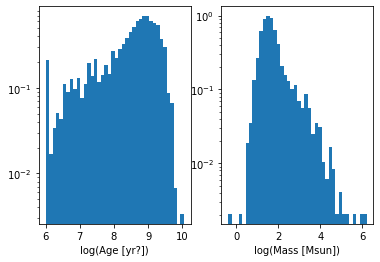

In [14]:
f,(ax1, ax2) = plt.subplots(1,2)

ax1.hist(logAge, bins=40, density=True)
ax1.set_xlabel('log(Age [yr?])')
ax1.set_yscale('log')

ax2.hist(logMass, bins=40, density=True)
ax2.set_xlabel('log(Mass [Msun])')
ax2.set_yscale('log')


### As if I'm only reading from the file

[5.12436104e-07]


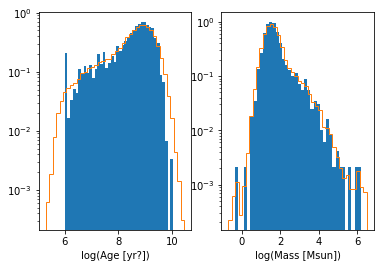

In [15]:
df = pd.read_csv("OCcompiled_hasAgeMass.csv")

data = np.vstack((df['logAge'].values, df['logMass'].values))
KDE = gaussian_kde(data)
sample = KDE.resample(size=int(1e5))

nbins = 40

f,(ax1, ax2) = plt.subplots(1,2)
ax1.hist(df['logAge'].values, bins=nbins, density=True)
ax1.hist(sample[0,:], bins=nbins, density=True, histtype='step')
ax1.set_xlabel('log(Age [yr?])')
ax1.set_yscale('log')

ax2.hist(df['logMass'].values, bins=nbins, density=True)
ax2.hist(sample[1,:], bins=nbins, density=True, histtype='step')
ax2.set_xlabel('log(Mass [Msun])')
ax2.set_yscale('log')

lt = 5
lm = 2
values = np.vstack([lt, lm])
print(KDE(values))
#NOTE: the age KDE seems to be missing the edges.  Maybe I should set those to zero automatically?

### Make a smaller file that has everything we need for the EBLSST code

Name, RA, Dec, dist[kpc], rh[pc], mass[Msun], Age[Myr], Z, sigma_v[km/s]

In [16]:
df = pd.read_csv("OCcompiled.csv")


name = []
RA = []
Dec = []

logMass = []
logAge = []
for index, row in df.iterrows():
    name.append(row['name'])
    
    #RA
    if (pd.notnull(row['ra'])):
        RA.append(row['ra'])
    elif (pd.notnull(row['RA_2000'])):
        RA.append(row['RA_2000'])
    else:
        print('NO RA', row['name'])
        #print('\nNO RA', row)
     
    #Dec
    Dec.append(row['dec'])
    
    #age
    if (pd.notnull(row['log_age'])): #MWSC
        logAge.append(row['log_age'])
    elif (pd.notnull(row['logt'])): #Solaris
        logAge.append(row['logt'])
    elif (pd.notnull(row['log(t[yr])K'])): #Kharchenko
        logAge.append(row['log(t[yr])K'])
    elif (pd.notnull(row['Age'])): #WEBDA
        logAge.append(np.log10(row['Age']))

print(len(name),len(RA))

NO RA Lynga_7
NO RA NGC_3324
NO RA Platais_3
NO RA Platais_9
NO RA Sigma_Ori
NO RA Berkeley_42
NO RA van_den_Bergh-Hagen_176
NO RA ESO092-SC18
NO RA ESO093-SC08
NO RA Hyades
3013 3003
